In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("wallet_transactions.csv")
df.head(4)

,userWallet,network,protocol,action,amount,assetSymbol,assetPriceUSD,poolId,timestamp_utc,txHash,logId
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,deposit,2.000000e+03,USDC,0.993832,0x2791bca1f2de4661ed88a30c99a7a9449aa84174,2021-08-17T05:29:26,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...
1,0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,deposit,1.450000e+14,WMATIC,1.970307,0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270,2021-05-20T15:36:53,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...
2,0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,deposit,1.000000e+09,WMATIC,0.922377,0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270,2021-07-24T09:28:33,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...
3,0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,deposit,4.000000e+09,WMATIC,1.057483,0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270,2021-07-31T23:15:18,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...


In [5]:
df.isnull()

,userWallet,network,protocol,action,amount,assetSymbol,assetPriceUSD,poolId,timestamp_utc,txHash,logId
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,False,False


## Feature Engineering


Column: amount
count    1.000000e+05
mean     6.544795e+15
std      1.264935e+17
min      0.000000e+00
25%      2.347008e+02
50%      5.204440e+05
75%      2.499973e+13
max      1.273000e+19
Name: amount, dtype: float64
Number of rows with amount <= 0: 248

Column: assetPriceUSD
count    100000.000000
mean       1997.901165
std        8166.822331
min           0.000000
25%           0.999311
50%           1.003320
75%           1.474938
max       64664.127500
Name: assetPriceUSD, dtype: float64
Number of rows with assetPriceUSD <= 0: 248


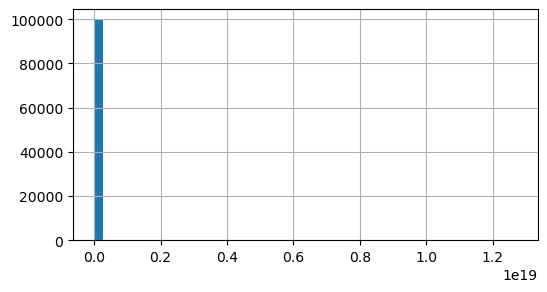

In [ ]:
import pandas as pd

df = pd.read_csv("wallet_transactions.csv")

numerical_cols = ["amount", "assetPriceUSD"]

for col in numerical_cols:
    print(f"\nColumn: {col}")
    print(df[col].describe())

    non_positive = df[df[col] <= 0]
    print(f"Number of rows with {col} <= 0: {len(non_positive)}")

    df[col].hist(bins=50, figsize=(6,3))

In [ ]:
df = pd.read_csv("wallet_transactions.csv")

df["timestamp_utc"] = pd.to_datetime(df["timestamp_utc"], errors="coerce")

print(df["timestamp_utc"].head())
print("\nAny nulls after conversion:", df["timestamp_utc"].isnull().sum())

0   2021-08-17 05:29:26
1   2021-05-20 15:36:53
2   2021-07-24 09:28:33
3   2021-07-31 23:15:18
4   2021-04-19 15:25:07
Name: timestamp_utc, dtype: datetime64[ns]

Any nulls after conversion: 0


In [12]:
df.head()

,userWallet,network,protocol,action,amount,assetSymbol,assetPriceUSD,poolId,timestamp_utc,txHash,logId
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,deposit,2.000000e+03,USDC,0.993832,0x2791bca1f2de4661ed88a30c99a7a9449aa84174,2021-08-17 05:29:26,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...
1,0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,deposit,1.450000e+14,WMATIC,1.970307,0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270,2021-05-20 15:36:53,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...
2,0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,deposit,1.000000e+09,WMATIC,0.922377,0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270,2021-07-24 09:28:33,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...
3,0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,deposit,4.000000e+09,WMATIC,1.057483,0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270,2021-07-31 23:15:18,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...
4,0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,redeemunderlying,5.015480e-01,USDC,1.002130,0x2791bca1f2de4661ed88a30c99a7a9449aa84174,2021-04-19 15:25:07,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...


In [13]:
df = df.dropna()

## Visualization

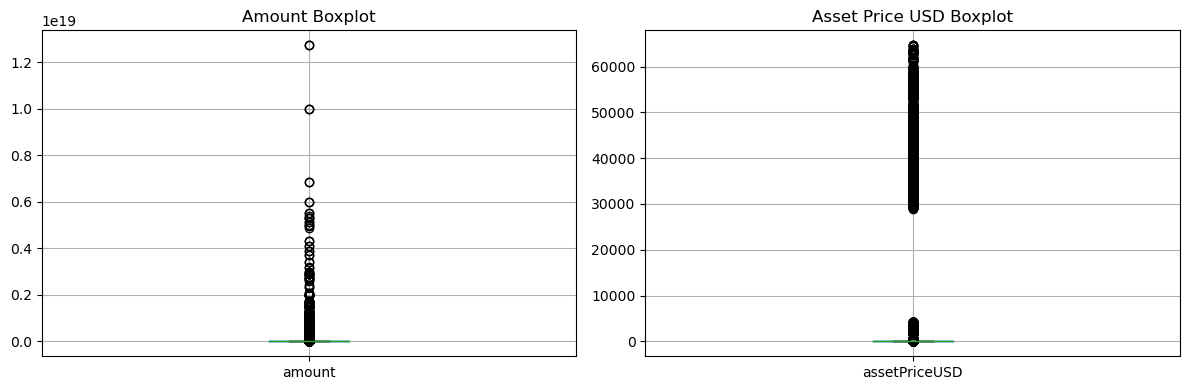

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df.boxplot(column="amount")
plt.title("Amount Boxplot")

plt.subplot(1, 2, 2)
df.boxplot(column="assetPriceUSD")
plt.title("Asset Price USD Boxplot")

plt.tight_layout()
plt.show()


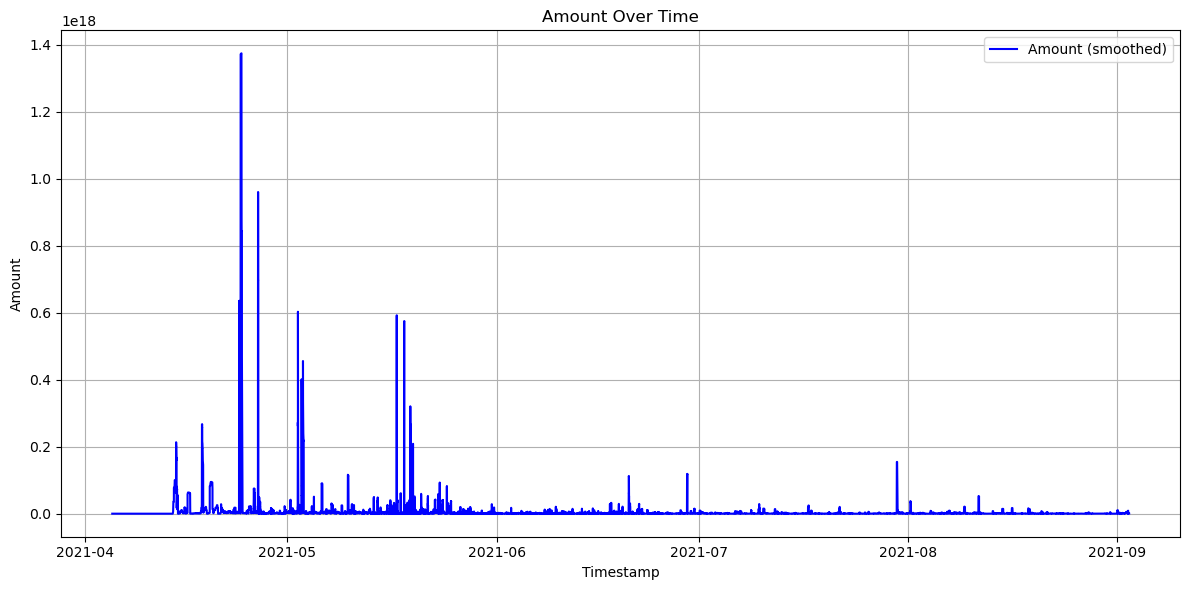

In [ ]:
df["timestamp_utc"] = pd.to_datetime(df["timestamp_utc"], errors="coerce")
df = df.sort_values("timestamp_utc")

df["amount_smooth"] = df["amount"].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(df["timestamp_utc"], df["amount_smooth"], color="blue", label="Amount (smoothed)")

plt.title("Amount Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Amount")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


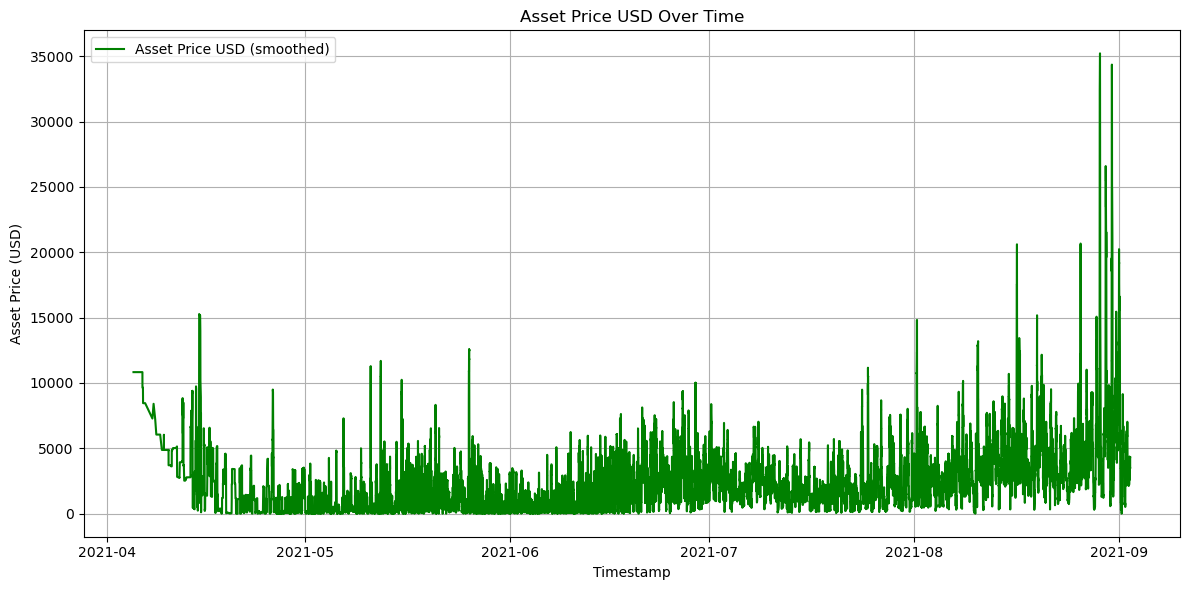

In [ ]:
df["timestamp_utc"] = pd.to_datetime(df["timestamp_utc"], errors="coerce")
df = df.sort_values("timestamp_utc")

df["price_smooth"] = df["assetPriceUSD"].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(df["timestamp_utc"], df["price_smooth"], color="green", label="Asset Price USD (smoothed)")

plt.title("Asset Price USD Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Asset Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## MODEL TRAINING

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

agg_df = df.groupby("userWallet").agg({
    "amount": ["sum", "mean", "std", "count"],
    "assetPriceUSD": ["mean", "std"],
    "timestamp_utc": "nunique",  
    "action": pd.Series.nunique   
}).fillna(0)


agg_df.columns = ["_".join(col).strip() for col in agg_df.columns]
agg_df.reset_index(inplace=True)


np.random.seed(42)
agg_df["credit_score"] = np.random.randint(300, 1000, size=len(agg_df))

X = agg_df.drop(["userWallet", "credit_score"], axis=1)
y = agg_df["credit_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("✅ Model trained.")
print(f"📊 RMSE: {rmse:.2f}")
print(f"📈 R² Score: {r2:.4f}")

✅ Model trained.
📊 RMSE: 227.61
📈 R² Score: -0.2355


In [ ]:
agg_df["predicted_credit_score"] = model.predict(X)

agg_df[["userWallet", "predicted_credit_score"]].tail(10)

,userWallet,predicted_credit_score
3487,0x0614e07756390441cb246c886917487840e74f7d,455.800000
3488,0x0615774010b017e7ec09d228ef37d06564a1d825,661.230000
3489,0x061667d49211840a590513f622a92ec170de7879,644.140000
3490,0x061716a85aba5e37626e4a2c33596d59823d30b8,461.580000
3491,0x0617d8b4509d856bcfd0870b1bb27c8f68e1d536,798.400000
3492,0x06185db89f5c8ef5e5a0abc95c5cb69b54c33f30,545.001286
3493,0x06189341e523a52ae10c4bd4a7774371fac1b249,513.070000
3494,0x0618c450370822c5cb25ec143a3008230d8e2c12,404.640000
3495,0x0618e615c8c9b5efc8c8eadc68be7182bdc455e2,625.730000
3496,0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a,652.910000


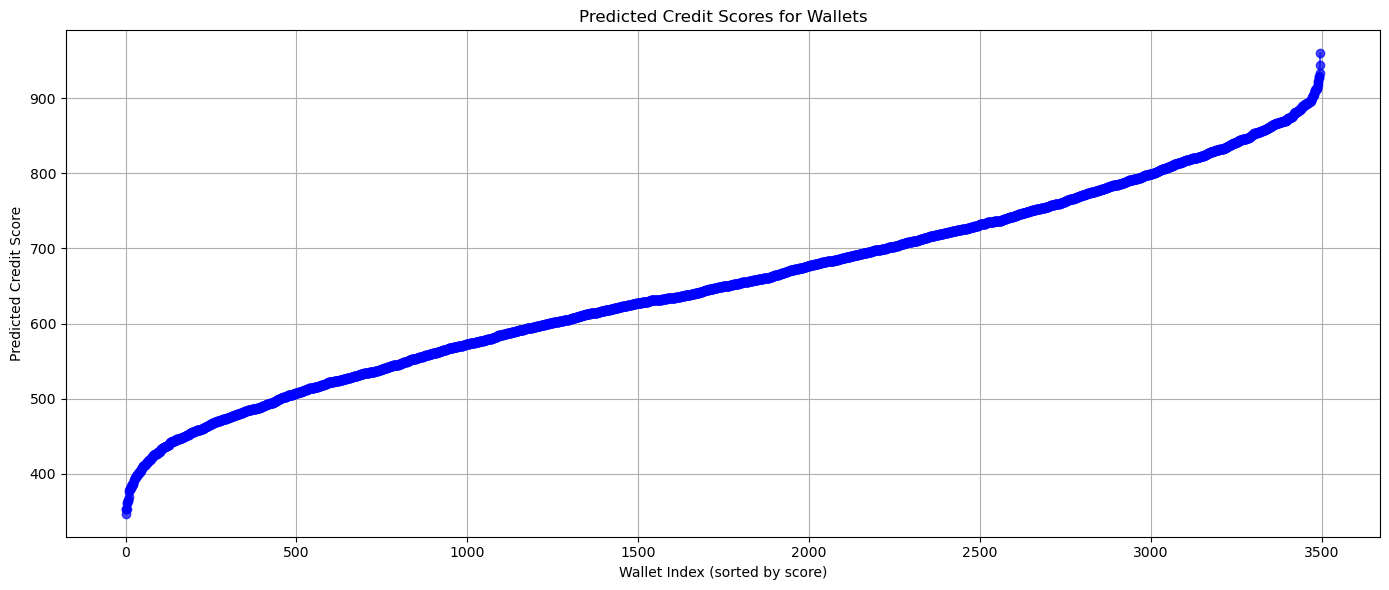

In [ ]:
plot_df = agg_df[["userWallet", "predicted_credit_score"]].sort_values("predicted_credit_score").reset_index(drop=True)

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(plot_df["predicted_credit_score"], marker="o", linestyle="-", color="blue", alpha=0.7)

plt.title("Predicted Credit Scores for Wallets")
plt.xlabel("Wallet Index (sorted by score)")
plt.ylabel("Predicted Credit Score")
plt.grid(True)
plt.tight_layout()
plt.show()
